# Trabajo 3. Aprendizaje Automático I
# Jorge Pablo Ávila Gómez

## Datos
Los datos provienen de la web InsideAirBnB, dedicada al estudio de los alquileres vacacionales
ofrecidos en la plataforma AirBnB. El fichero es una versión editada, a fin de facilitar la tarea, del listado original
de información sobre las ofertas existentes, para la ciudad de Madrid, en abril de 2017. Contiene
**13321 registros con 11 campos cada uno**, correspondientes a diferentes características de cada
oferta de alojamiento.

# Tarea Clasificación
En este documento vamos a tratar la primera parte del tercer trabajo de la asignatura que consiste en una tarea de clasificación. Se usan los mismos datos que en el trabajo 1 donde se tiene que predecir la variable ```room_type```.
La primera parte del documento sobre la exploración de los datos es equivalente a la del trabajo 1.

## 1. Importar los datos y un primer estudio estadístico:

In [1]:
import pandas as pd
import numpy as np

raw_data = pd.read_csv("airbnb.csv")
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13321 entries, 0 to 13320
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             13321 non-null  object 
 1   neighbourhood                   13321 non-null  object 
 2   latitude                        13321 non-null  float64
 3   longitude                       13321 non-null  float64
 4   room_type                       13321 non-null  object 
 5   price                           13321 non-null  int64  
 6   minimum_nights                  13321 non-null  int64  
 7   number_of_reviews               13321 non-null  int64  
 8   reviews_per_month               13321 non-null  float64
 9   calculated_host_listings_count  13321 non-null  int64  
 10  availability_365                13321 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.1+ MB


De aquí podemos observar ya algunas características importantes:
- Tenemos un dataset con un total de **11 columnas**
- con **13321 entradas**.
- Un dato muy importante es que no faltan datos en ninguna columna.
- Tenemos **3** variable de tipo `object` entre ellas la variable objetivo `room type` .
- El resto de variables (**8**) son **numéricas**.

In [2]:
## Podemos observar algunas filas del dataset
raw_data.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Centro,Justicia,40.424715,-3.698638,Entire home/apt,49,28,35,0.42,1,99
1,Centro,Embajadores,40.413418,-3.706838,Entire home/apt,80,5,18,0.30,1,188
2,Moncloa - Aravaca,Argüelles,40.424920,-3.713446,Entire home/apt,40,2,21,0.25,9,195
3,Moncloa - Aravaca,Casa de Campo,40.431027,-3.724586,Entire home/apt,55,2,3,0.13,9,334
4,Latina,Cármenes,40.403410,-3.740842,Private room,16,2,23,0.76,2,250


### 1.1 Estudio estadístico de las variables numéricas

In [3]:
raw_data.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,13321.000000,13321.000000,13321.000000,13321.000000,13321.000000,13321.000000,13321.000000,13321.000000
mean,40.420730,-3.697268,69.171834,3.010885,22.986037,1.520329,7.605885,205.867202
std,0.020344,0.023832,103.721126,12.835619,38.406006,1.852367,19.619972,126.968961
min,40.331888,-3.863907,9.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,40.410090,-3.707856,31.000000,1.000000,1.000000,0.110000,1.000000,84.000000
50%,40.418731,-3.701602,53.000000,2.000000,7.000000,0.780000,2.000000,247.000000
75%,40.427997,-3.693818,80.000000,3.000000,28.000000,2.320000,4.000000,321.000000
max,40.562736,-3.526821,7700.000000,1125.000000,446.000000,17.210000,145.000000,365.000000


- Podemos observar de nuevo que no tenemos ``null values`` en las columnas numéricas, todas tiene 13321 valores.
- Es interesante que la columna ``price`` sean números enteros y el 50% de los valores entre 31 y 80, posiblemente sea el precio por noche.
- En la columna ``minimum_nights`` sorprende que el valor máximo sea 1125 que se corresponde con 1125/30/12 = 3 años, quizas es un poco raro para una oferta en airbnb. Habrá que estudiar los outliers. 

In [4]:
sum(raw_data.minimum_nights > 365)  # 1 year

1

Curiosamente solo hay una oferta que pide un mínimo de noches mayor que 1 año, es el caso específico que veíamos que pedia 3 años de alquiler.

In [5]:
raw_data[raw_data.minimum_nights > 365]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
705,Centro,Palacio,40.41707,-3.708815,Entire home/apt,62,1125,2,0.25,1,0


Observamos ahora los histogramas de las diferentes variables:

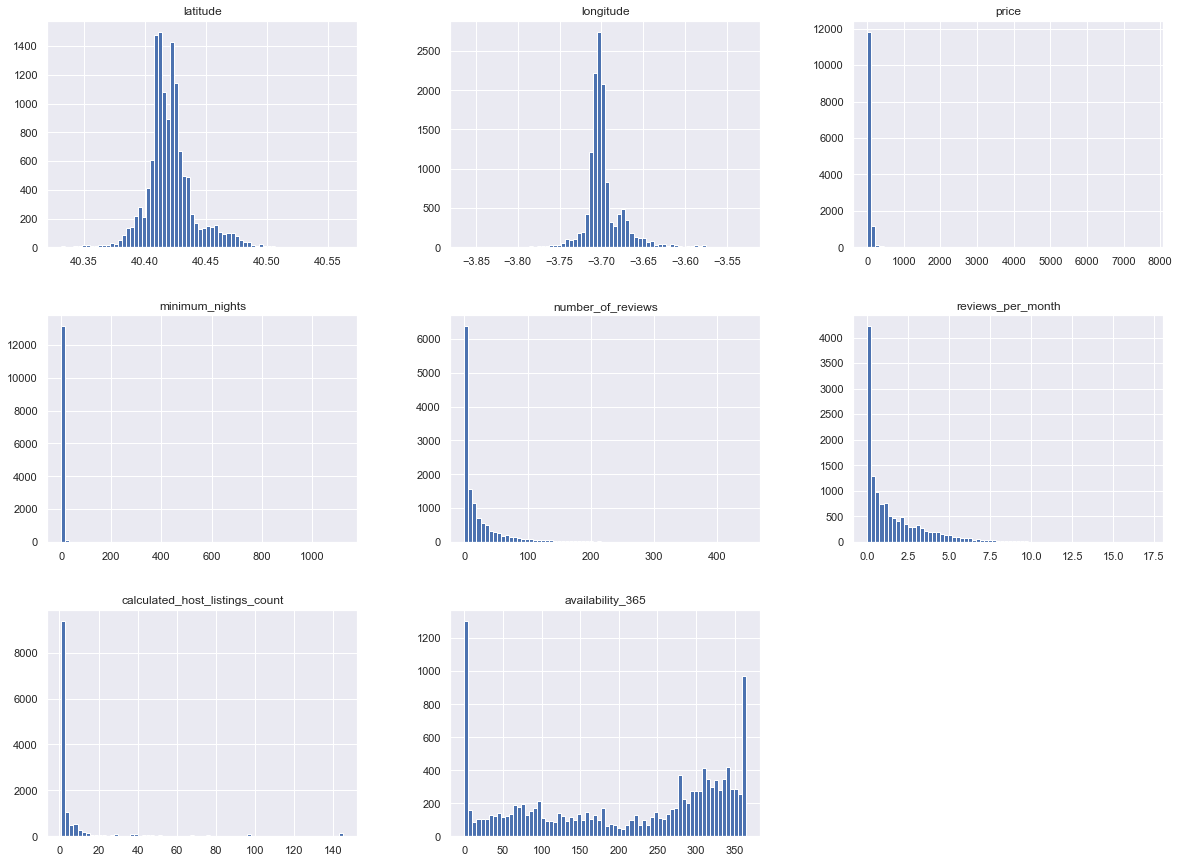

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

raw_data.hist(bins=70, figsize=(20, 15))
plt.show()

Aquí podemos observar que para variables como `price` o `minimum nights` la mayoría de los valores están cerca de 0. Habiendo valores muy lejanos de la mediana. Para `number of reviews`, `reviews per month` y `calculatred host listing count` las distribuciones son parecidas, pero con menos influencia de valores atípicos. Por otro lado, `latitude` y `longitude` presentan distribuciones normales y la distribución de `availability 365` es aproximadamente uniforme.

En este estúdio no tenemos muchos valores diferentes (13321 no son demasiados) y tampoco una forma clara de comprobar si los valores atípicos son errores o tal vez, simplemente sean datos reales (es raro que en airBnB se pida 3 años de estancia mínima pero podría ser posible). He considerado usar todos los valores proporcionados en el dataset y utilizar las transformaciones adecuadas para disminuir la influencia de los outliers.

### 1.2 Estudio de las variables categóricas

neighbourhood_group
Number of categories: 21
Centro                   6773
Chamberí                  960
Salamanca                 883
Arganzuela                790
Tetuán                    463
Moncloa - Aravaca         450
Retiro                    439
Latina                    379
Chamartín                 361
Carabanchel               358
Ciudad Lineal             308
Puente de Vallecas        222
Hortaleza                 185
Fuencarral - El Pardo     170
Usera                     145
San Blas - Canillejas     117
Villaverde                 83
Barajas                    81
Moratalaz                  74
Villa de Vallecas          46
Vicálvaro                  34
Name: neighbourhood_group, dtype: int64


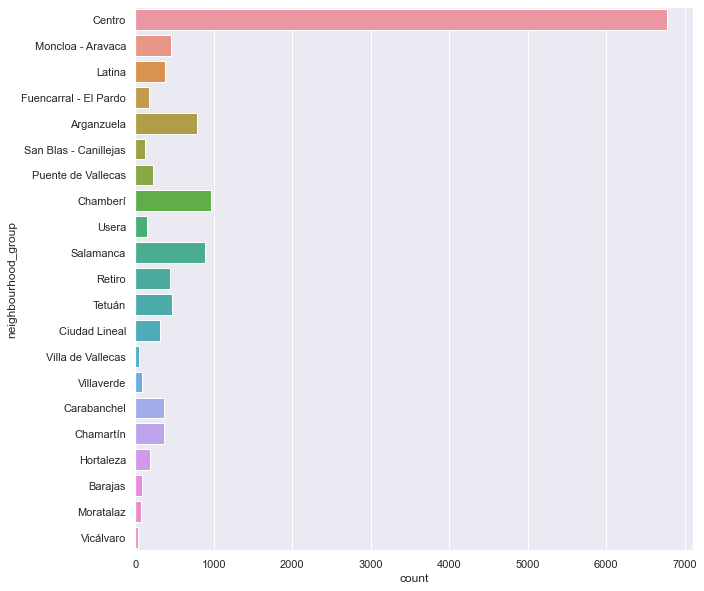

--------------------------------------------------
neighbourhood
Number of categories: 126
Embajadores       1848
Universidad       1363
Palacio           1084
Sol                942
Justicia           788
                  ... 
Rosas                4
Santa Eugenia        4
Cuatro Vientos       3
Orcasitas            2
El Pardo             1
Name: neighbourhood, Length: 126, dtype: int64


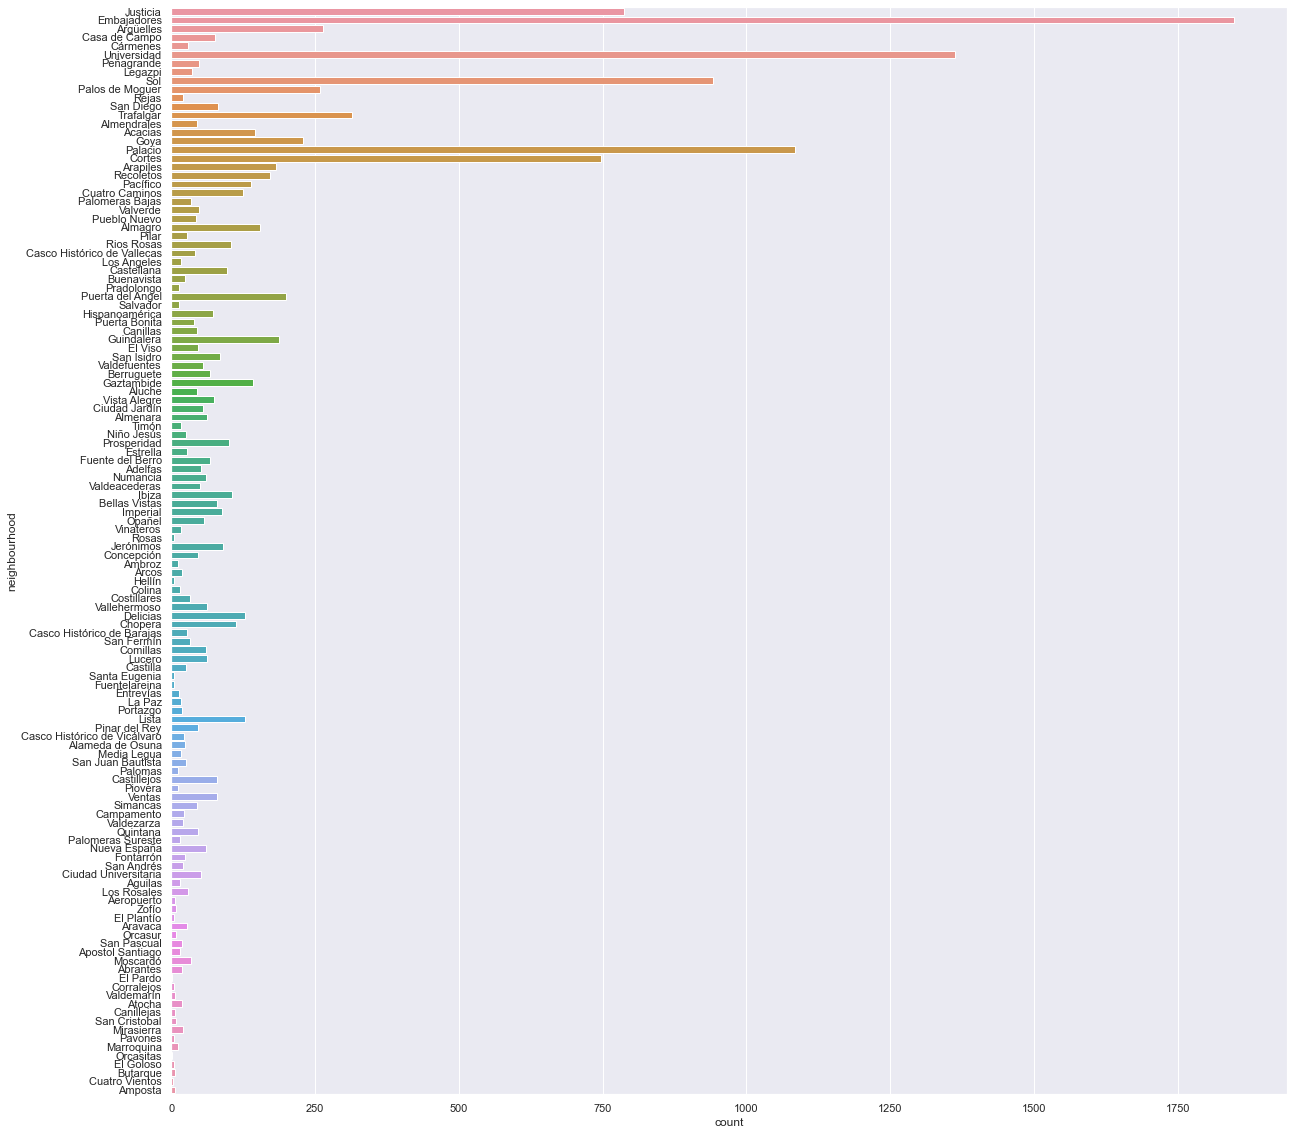

--------------------------------------------------
room_type
Number of categories: 3
Entire home/apt    7926
Private room       5203
Shared room         192
Name: room_type, dtype: int64


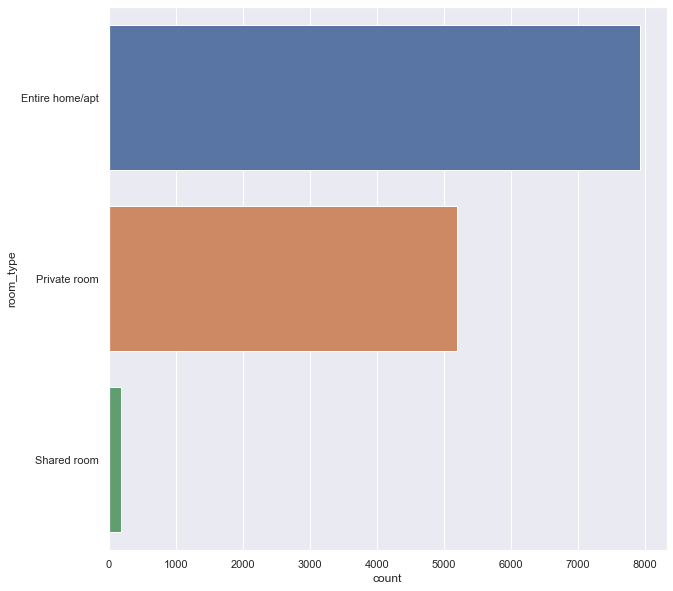

--------------------------------------------------


In [7]:
sizes = [(10, 10), (20, 20)]
for i, col in enumerate(raw_data.columns):
    if str(raw_data[col].dtypes) == "object":  # Only categorical columns
        print(col)
        print("Number of categories:", len(raw_data[col].unique()))
        print(raw_data[col].value_counts())  # The count of each different value

        plt.figure(figsize=sizes[i % 2])
        ax = sns.countplot(y=col, data=raw_data)  # Count plot

        plt.show()
        print("-" * 50)

- Observamos que para la variable objetivo `room type` tenemos solo 3 categorias diferentes pero están desbalanceadas, especialmente la categoría `Shared room` con solo 192 casos.
- Para la variable `neighbourhood` tenemos muchas categorías, 126, para `neighbourhood_group` tenemos menos, solo 21. Estas dos variables estarán posiblemente muy relacionadas (cada `neighbourhood_group` estará formado por un conjunto de `neighbourhood`).  
- Del mismo modo, las variables `latitude` y `longitude` codifican también información de localización, posiblemente estando correlacionadas con las variables `neighbourhood` y `neighbourhood_group`.
- Por tanto, Se estudiará si es necesario incluir las variables categóricas `neighbourhood` y `neighbourhood_group` en los diferentes modelos.

### 1.3 Estudiar si faltan datos

In [8]:
# Checking for missing values
raw_data.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

No falta ningún valor.

## 2. Preparación del test set con clases proporcionadas

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(
    raw_data, test_size=0.2, random_state=88, stratify=raw_data.room_type
)

- Se han dividido los datos en un `train_set` y un `test_set` del 20% de los datos. 
- Se ha realizadido una división estratificada según las clases de la columna objetivo `room type`. Así conseguimos que la distribución, no balanceada, de las clases se mantenga en el `train_set` y `test_set`, como podemos observar en las gráficas siguientes.

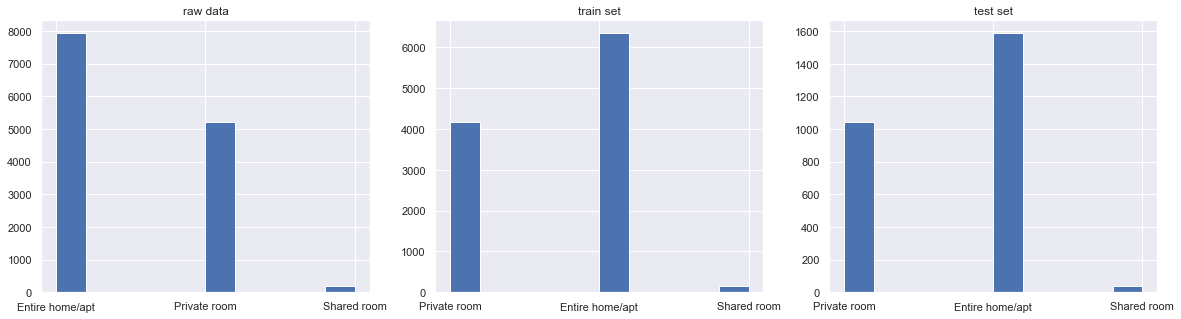

In [10]:
plt.subplot(131)
raw_data.room_type.hist(figsize=(20, 5))
plt.title("raw data")

plt.subplot(132)
train_set.room_type.hist()
plt.title("train set")

plt.subplot(133)
test_set.room_type.hist()
plt.title("test set")
plt.show()

## 3. Limpieza de los datos, transformación de datos categóricos y escalado de datos numéricos

En este apartado se han importado las funciones para el preprocesado y transformación de los datos.

Para los datos categóricos se va a usar la función `OneHotEncoder` que codifica las variables categóricas en columnas de ceros y unos para cada categoría.

Para los valores numéricos se va a usar la función `QuantileTransformer`. Esta función la vamos a usar para que nuestras variables sigan una distribución uniforme entre 0 y 1 usando como bases los cuantiles, de este modo se reduce la influencia de los valores atípicos. Esta transformación va a ser muy útil para el modelo `ComplementNB` que admite solo datos positivos y para el modelo `KNeighborsClassifier`, el cual es sensible a outliers y el preprocesado ayuda a mejorar los resultados.

Como observamos en las gráficas las variables numéricas presentan ahora una distribución más homogénea en todo el intervalo en comparación con los datos originales. 

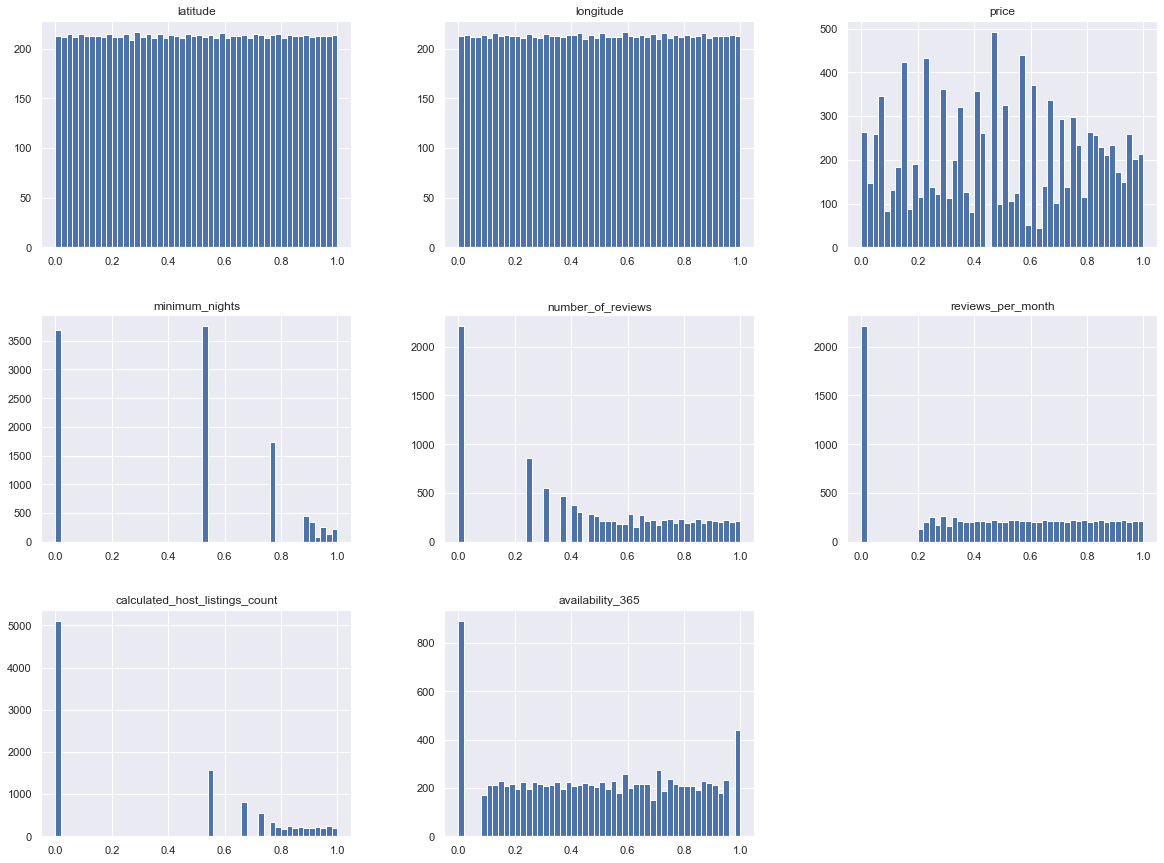

In [11]:
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer
from sklearn.compose import ColumnTransformer, make_column_selector

X_train = train_set.drop("room_type", axis=1)
y_train = train_set.room_type
# We prepare a ColumnTransoformer to see how the QuantileTransformer behaves
ct = ColumnTransformer(
    [
        ("num", QuantileTransformer(), make_column_selector(dtype_include=np.number)),
    ],
    remainder="drop",
)
X_train_t = ct.fit_transform(X_train)
X_train_t = pd.DataFrame(X_train_t, columns=X_train.columns[2:])
X_train_t.hist(bins=50, figsize=(20, 15))
plt.show()

## 4. Funciones de utilidad

En esta primera celda aparecen una serie de funciones que se usarán durante el entrenamiento y estudio de los diferentes modelos.

In [12]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

# This function transforms a dataset using OneHotEncoder for the categorical variables
# and a transformer of your choice for the numerical ones.
# You can choose if the transformation is applied independently to the numerical or categorical variables.
# The non-transformed variables will be dropped by default.
def conf_transformer(
    transformer, X_train=X_train, num=True, cat=True, remainder="drop"
):
    trans = []
    if num:
        trans.append(
            ("num", transformer, make_column_selector(dtype_include=np.number))
        )
    if cat:
        trans.append(
            ("cat", OneHotEncoder(), make_column_selector(dtype_include=object))
        )
    ct = ColumnTransformer(
        trans,
        remainder=remainder,
    )

    X_train_t = ct.fit_transform(X_train)
    return X_train_t


# Calculate the CVScore using 10 folds and accuracy as the score.
# It returns the mean of the 10 folds.
def test_score_model(model, X_train_t):
    scores = cross_val_score(model, X_train_t, y_train, cv=10, scoring="accuracy")
    return scores.mean()


# Calculate the CV prediction of a model using 10 folds.
# The result is used to plot the confussion matrix.
def test_predict_model(model, X_train_t):
    scores = cross_val_predict(model, X_train_t, y_train, cv=10)
    return scores


# This function print the results and plot a confusion matrix.
def plot_result(results):
    fig, axes = plt.subplots(1, 3, sharey=True, figsize=(10, 5))
    for i, res in enumerate(results):
        print(f"Model: {res[0]}")  # The model used in the training
        option = res[1]
        # If we used numerical features: 1 if not: 0
        # If we used categorical features: 1 if not: 0
        print(f"Num atributes: {option[0]} | Cat atributes: {option[1]}")
        print(f"Accuracy: {res[2]:.4f}")  # The obtained accuracy

        # It calculates the confusion matrix and normalize the values
        # so we know the fraction of the correct predictions
        # in this case it is important as the classes are imbalanced.
        cf_matrix = confusion_matrix(y_train, res[3])
        row_sums = cf_matrix.sum(axis=1, keepdims=True)
        norm_cf_matrix = cf_matrix / row_sums

        # Plot the confusion matrix
        axes[i].set_title(f"Num atributes: {option[0]} | Cat atributes: {option[1]}")
        sns.heatmap(
            norm_cf_matrix,
            ax=axes[i],
            square=True,
            annot=True,
            cbar=False,
            cmap="YlOrRd",
            xticklabels=y_train.unique(),
            yticklabels=y_train.unique(),
        )
        axes[i].set_xlabel("Predicted label")
        axes[0].set_ylabel("True label")

        print("---" * 20)

## 5. Preprocesado

En la siguiente celda se comparan los transformadores `StandarScaler` y `QuantileTransformer`. Para los modelos de maquinas de vectores de soporte es muy importante que las diferentes variables se encuentre en los mismos ordenes de magnitud, ya que el modelo intentará maximizar la distancia en la zona de separación y si hay variables con una escala mayor influirán más en la predicción. Estudiamos ``StandarScaler`` como el transformador más utilizado junto a ``QuantileTransformer`` que transforma los datos a un rango 0-1 según el percentil en el que se encuentre y es menos sensible a datos atípicos.

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, QuantileTransformer
from sklearn.svm import LinearSVC, SVC

ct = ColumnTransformer(
    [
        ("num", StandardScaler(), make_column_selector(dtype_include=np.number)),
        ("cat", OneHotEncoder(), make_column_selector(dtype_include=object)),
    ],
)

svm_clf = Pipeline(
    [
        ("transformer", ct),
        ("linear_svc", LinearSVC(C=1, loss="hinge", max_iter=100000)),
    ]
)

X_train = train_set.drop("room_type", axis=1)
y_train = train_set.room_type


# StandarScaler
model = LinearSVC(C=1, loss="hinge", max_iter=100000)
X_train_t = ct.fit_transform(X_train)
scores = cross_val_score(model, X_train_t, y_train, cv=5, scoring="accuracy")
print("StandarScaler: ", scores.mean())

# QuantileTransformer
ct = ColumnTransformer(
    [
        ("num", QuantileTransformer(), make_column_selector(dtype_include=np.number)),
        ("cat", OneHotEncoder(), make_column_selector(dtype_include=object)),
    ],
)
model = LinearSVC(C=1, loss="hinge", max_iter=100000)
X_train_t = ct.fit_transform(X_train)
scores = cross_val_score(model, X_train_t, y_train, cv=5, scoring="accuracy")
print("QuantileTransformer: ", scores.mean())

StandarScaler:  0.862706821397348
QuantileTransformer:  0.8830707337322805


En este caso encontrados resultados parecidos para los dos transformadores, con exactitudes por encima de 0.85. Sin embargo, como ha sido analizado usando validación cruzada y el transformador ```QuantileTransformer``` ha mostrado mayores exactitudes, usaremos este transformador para el entrenamiento de los modelos.

## 6. LinearSVC

En este apartado vamos a realizar el entrenamiento del modelo LinearSVC usando sus parámetros por defecto, aunque se han realizado algunos cambios. Se usa 'hinge' como la función de perdida porque es la recomendada en el libro de referencia y también porque es la función de pérdida que usa el modelo SVC, por tanto, podremos comparar mejor los resultados de los dos modelos. Se añade la propiedad ```class_weight="balanced"``` para indicar que estamos trabajando con clases desbalanceadas y se aumenta en número de interacciones a 100000 para evitar errores de no convergencia.

Model: LinearSVC(class_weight='balanced', loss='hinge', max_iter=100000)
Num atributes: 0 | Cat atributes: 1
Accuracy: 0.6042
------------------------------------------------------------
Model: LinearSVC(class_weight='balanced', loss='hinge', max_iter=100000)
Num atributes: 1 | Cat atributes: 0
Accuracy: 0.8784
------------------------------------------------------------
Model: LinearSVC(class_weight='balanced', loss='hinge', max_iter=100000)
Num atributes: 1 | Cat atributes: 1
Accuracy: 0.8774
------------------------------------------------------------


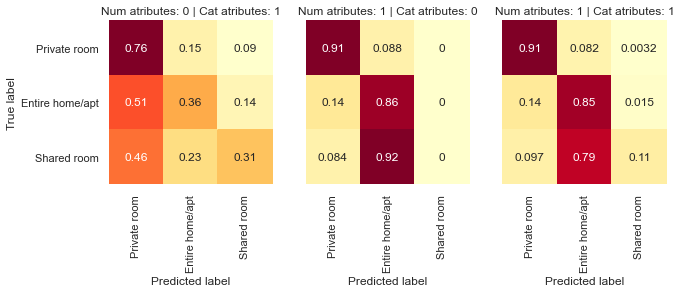

In [14]:
X_train = train_set.drop("room_type", axis=1)
y_train = train_set.room_type


model = LinearSVC(loss="hinge", class_weight="balanced", max_iter=100000)
qt = QuantileTransformer()

# A list of the different configurations with or without some variables
options = [[i, j] for i in range(2) for j in range(2)]
options.remove([0, 0])  # Avoid training without any variable.

results = []
for opt in options:
    X_train_t = conf_transformer(qt, X_train, num=opt[0], cat=opt[1])
    results.append(
        [
            model,
            opt,
            test_score_model(model, X_train_t),
            test_predict_model(model, X_train_t),
        ]
    )

plot_result(results)

Se ha entrenado con todas las variables y siguiendo una estrategia parecida a la del ejercicio 1. Se han estudiado 3 modelos, uno usando solo las variables categóricas, otro usando solo las numéricas y finalmente, un modelo usando todas las variables. Para cada modelo representamos su matrix de confusión para analizar los resultados.

Vemos que se obtienen las exactitudes mas altas cuando se incluyen las variables numéricas alcanzando 0.8784 y 0.8774. Pero si usamos solo las variables categóricas solo obtenemos 0.6038 de exactitud. Observando las matrices de confusión vemos que los modelos no son buenos clasificando la clase minoritaria, alcanzandose solo 0.27 en el modelo que usa solo variables categóricas. Para las otras dos clases se alcanzan buenos resultados, 0.91 para private room y 0.86 para Etire home/apt. En general, el modelo con mejores resultados es el que usa solo las variables numéricas.

## 7. SVC

En este apartado se realiza el entrenamiento usando el modelo SVC. En este caso usamos todos los parámentros por defecto como indica el enunciado del problema. Solo anadimos el parámetro ```class_weight="balanced"``` para indicar que estamos trabajando con clases desbalanceadas.

Model: SVC(class_weight='balanced')
Num atributes: 0 | Cat atributes: 1
Accuracy: 0.5674
------------------------------------------------------------
Model: SVC(class_weight='balanced')
Num atributes: 1 | Cat atributes: 0
Accuracy: 0.8343
------------------------------------------------------------
Model: SVC(class_weight='balanced')
Num atributes: 1 | Cat atributes: 1
Accuracy: 0.8412
------------------------------------------------------------


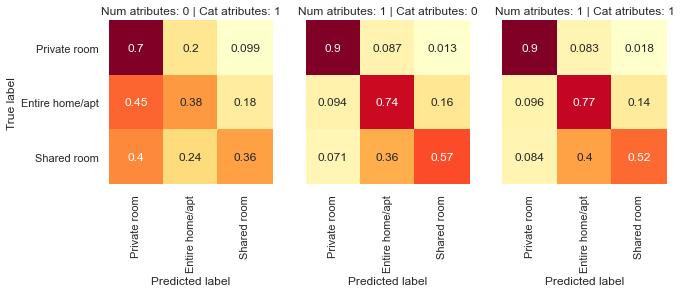

In [15]:
X_train = train_set.drop("room_type", axis=1)
y_train = train_set.room_type


model = SVC(class_weight="balanced")
qt = QuantileTransformer()

# A list of the different configurations with or without some variables
options = [[i, j] for i in range(2) for j in range(2)]
options.remove([0, 0])  # Avoid training without any variable.

results = []
for opt in options:
    X_train_t = conf_transformer(qt, X_train, num=opt[0], cat=opt[1])
    results.append(
        [
            model,
            opt,
            test_score_model(model, X_train_t),
            test_predict_model(model, X_train_t),
        ]
    )

plot_result(results)

Se ha seguido la misma estrategia que en el caso anterior, entrenando tres modelos diferentes. Uno solo con variables categóricas, otro solo con las numéricas y un tercero con todas las variables. Además de su exactitud podemos ver la matriz de confusión de cada modelo.

Con respecto a la exactitud vemos que el modelo con solo variables categóricas alcanza 0.5674, mientras que los otros dos modelos  llegan a unas exactitudes mayores de 0.80. En estos tres modelos se realiza una mejor clasificación de la clase minoritaria, llegando a 0.57 en el modelo que usa solo las variables numéricas.

Como se ha entrenado con los parámetros del modelo por defecto, el kernel usado de *rbf*. Se ha decidido realizar un entrenamiento extra usando el kernel *linear* para poder comparar mejor entre los tres casos.

Model: SVC(class_weight='balanced', kernel='linear')
Num atributes: 0 | Cat atributes: 1
Accuracy: 0.5676
------------------------------------------------------------
Model: SVC(class_weight='balanced', kernel='linear')
Num atributes: 1 | Cat atributes: 0
Accuracy: 0.7669
------------------------------------------------------------
Model: SVC(class_weight='balanced', kernel='linear')
Num atributes: 1 | Cat atributes: 1
Accuracy: 0.7832
------------------------------------------------------------


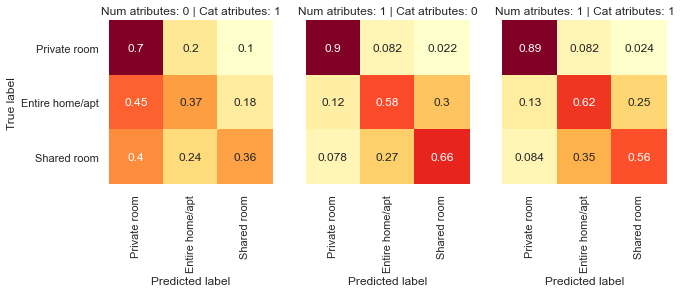

In [16]:
X_train = train_set.drop("room_type", axis=1)
y_train = train_set.room_type


model = SVC(kernel="linear", class_weight="balanced")
qt = QuantileTransformer()

# A list of the different configurations with or without some variables
options = [[i, j] for i in range(2) for j in range(2)]
options.remove([0, 0])  # Avoid training without any variable.

results = []
for opt in options:
    X_train_t = conf_transformer(qt, X_train, num=opt[0], cat=opt[1])
    results.append(
        [
            model,
            opt,
            test_score_model(model, X_train_t),
            test_predict_model(model, X_train_t),
        ]
    )

plot_result(results)

El uso del kernel *linear* empeora los resultados de exactitud con respecto al kernel *rbf*. Obteniendose como valor más alto 0.78 para el modelo con todas las variables. De nuevo el modelo con una menor exactitud es aquel que usa solo las variables categóricas. Como principal característica interesante, usando el kernel *linear*, se obtienen los modelos que mejor clasifica la clase minoritaria, alcanzado 0.66 en el modelo que usa solo las variables numéricas.

### Diferencias entre los modelos

La principal diferencia que podemos destacar es que los modelos SVC son mucho más lentos que el modelo linearSVC, debido a que tiene una complejidad computacional mayor. En los tres casos se observan patrones similares, obteniendose resultados muy parecidos en los modelos con solo variables numéricas y los modelos con todas las variables. También, en los tres casos los modelos que usan solo las variables categóricas son los que tienen peores exactitudes. En general, el modelo con mejor exactitud fue obtenido usando el modelo LinearSVC con solo las variables numéricas.

Con respecto a las matrices de confusión, en general todos los modelos tienen difucultades para clasificar correctamente la variable minoritaria Shared room. Siendo de 0 en el modelo con la exactitud más alta. El modelo que mejor clasifica la clase minoritaria es el modelo SVC usando solo las variables numéricas, alcanzando 0.66.

## 8. SVC Hiperparametrización

Para la afinación de los hiperparámetros se va a realizar la optimización de C y gamma, en el modelo SVC usando el kernel *rbf*. En el proceso se van a utilizar tanto las varibles categóricas como las numéricas. La busqueda de los hiperparámetros se va a realizar usando GridSearchCV, con 10 partes de validación cruzada. Se usa el parámentro verbose = 2 para ajustar el nivel de mensajes durante la busqueda, y el parámetro n_jobs a -2, el cual sirve para indicar que se usen todos los núcleos menos 1 (acelerando la busqueda, pero deja un núcleo libre para poder usar mientras tanto el ordenador). 

Para la busqueda de los hiperparámetros se ha seguido la sugerencia de realizar varias busquedas ajustando los intervalos. Para la primera busqueda se ha usado un rango espaciado en escala logarítmica entre 0.001 y 100 usando la función np.logspace.

In [17]:
# Rango de los parámetros para la primera busqueda
np.logspace(-3, 2.0, num=6)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [18]:
from sklearn.model_selection import GridSearchCV

X_train = train_set.drop("room_type", axis=1)
y_train = train_set.room_type

model = SVC(kernel="rbf", class_weight="balanced")
qt = QuantileTransformer()

X_train_t = conf_transformer(
    qt, X_train, num=True, cat=True
)  # All the variable are used
param_grid = [{"C": np.logspace(-3, 2.0, num=6), "gamma": np.logspace(-3, 2.0, num=6)}]

grid_search = GridSearchCV(
    model,
    param_grid,
    cv=10,
    scoring="accuracy",
    return_train_score=True,
    verbose=2,
    n_jobs=-2,
)

scores_gs = grid_search.fit(X_train_t, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  35 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-2)]: Done 156 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-2)]: Done 360 out of 360 | elapsed: 30.7min finished


In [19]:
scores_gs.best_params_

{'C': 10.0, 'gamma': 1.0}

Tras la primera ronda de busqueda se han obtenido los valores: ```{'C': 10.0, 'gamma': 1}```. Partiendo de estos valores ahora realizaremos otra busqueda con escala locarítmica con los valores obtenidos en el centro del intervalo.

In [20]:
print("C: ", np.logspace(0, 2.0, num=10))

C:  [  1.           1.66810054   2.7825594    4.64158883   7.74263683
  12.91549665  21.5443469   35.93813664  59.94842503 100.        ]


In [21]:
print("gamma: ", np.logspace(-1, 1, num=10))

gamma:  [ 0.1         0.16681005  0.27825594  0.46415888  0.77426368  1.29154967
  2.15443469  3.59381366  5.9948425  10.        ]


In [22]:
from sklearn.model_selection import GridSearchCV

X_train = train_set.drop("room_type", axis=1)
y_train = train_set.room_type

model = SVC(kernel="rbf", class_weight="balanced")
qt = QuantileTransformer()

X_train_t = conf_transformer(
    qt, X_train, num=True, cat=True
)  # All the variable are used
param_grid = [{"C": np.logspace(0, 2.0, num=10), "gamma": np.logspace(-1, 1, num=10)}]

grid_search = GridSearchCV(
    model,
    param_grid,
    cv=10,
    scoring="accuracy",
    return_train_score=True,
    verbose=2,
    n_jobs=-2,
)

scores_gs = grid_search.fit(X_train_t, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  35 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-2)]: Done 156 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-2)]: Done 359 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-2)]: Done 642 tasks      | elapsed: 29.0min
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed: 47.2min finished


In [23]:
scores_gs.best_params_

{'C': 21.544346900318832, 'gamma': 0.46415888336127786}

Tras la segunda ronda de busqueda se han obtenido los valores: ```{'C': 21.544346900318832, 'gamma': 0.46415888336127786} ```. A continuación, se va a realizar una ronda extra de busqueda, en este caso se va a usar una escala lineal.

In [24]:
print("gamma: ", np.linspace(0.27825594, 0.77426368, 10))

gamma:  [0.27825594 0.33336791 0.38847988 0.44359185 0.49870382 0.5538158
 0.60892777 0.66403974 0.71915171 0.77426368]


In [25]:
print("C: ", np.linspace(12.91549665, 35.93813664, 10))

C:  [12.91549665 15.47356776 18.03163887 20.58970998 23.14778109 25.7058522
 28.26392331 30.82199442 33.38006553 35.93813664]


In [26]:
# Escala lineal
from sklearn.model_selection import GridSearchCV

X_train = train_set.drop("room_type", axis=1)
y_train = train_set.room_type

model = SVC(kernel="rbf", class_weight="balanced")
qt = QuantileTransformer()

X_train_t = conf_transformer(
    qt, X_train, num=True, cat=True
)  # All the variable are used
param_grid = [
    {
        "C": np.linspace(12.91549665, 35.93813664, 10),
        "gamma": np.linspace(0.27825594, 0.77426368, 10),
    }
]

grid_search = GridSearchCV(
    model,
    param_grid,
    cv=10,
    scoring="accuracy",
    return_train_score=True,
    verbose=2,
    n_jobs=-2,
)

scores_gs = grid_search.fit(X_train_t, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  35 tasks      | elapsed:   59.1s
[Parallel(n_jobs=-2)]: Done 156 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-2)]: Done 359 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-2)]: Done 642 tasks      | elapsed: 17.4min
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed: 27.2min finished


In [27]:
scores_gs.best_params_

{'C': 23.147781090000002, 'gamma': 0.5538157955555556}

En la primera busqueda lineal se han obtenido los parámetros ```{'C': 23.147781090000002, 'gamma': 0.5538157955555556}```. Se decide realizar una busqueda lineal extra para para realizar un último ajuste fino de los parámetros.

In [28]:
print("gamma: ", np.linspace(0.49870382, 0.60892777, 10))

gamma:  [0.49870382 0.51095093 0.52319803 0.53544514 0.54769224 0.55993935
 0.57218645 0.58443356 0.59668066 0.60892777]


In [29]:
print("C: ", np.linspace(20.58970998, 25.7058522, 10))

C:  [20.58970998 21.15817023 21.72663047 22.29509072 22.86355097 23.43201121
 24.00047146 24.56893171 25.13739195 25.7058522 ]


In [30]:
# Escala lineal
from sklearn.model_selection import GridSearchCV

X_train = train_set.drop("room_type", axis=1)
y_train = train_set.room_type

model = SVC(kernel="rbf", class_weight="balanced")
qt = QuantileTransformer()

X_train_t = conf_transformer(
    qt, X_train, num=True, cat=True
)  # All the variable are used
param_grid = [
    {
        "C": np.linspace(20.58970998, 25.7058522, 10),
        "gamma": np.linspace(0.49870382, 0.60892777, 10),
    }
]

grid_search = GridSearchCV(
    model,
    param_grid,
    cv=10,
    scoring="accuracy",
    return_train_score=True,
    verbose=2,
    n_jobs=-2,
)

scores_gs = grid_search.fit(X_train_t, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  35 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-2)]: Done 156 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-2)]: Done 359 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-2)]: Done 642 tasks      | elapsed: 16.3min
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed: 22.2min finished


In [31]:
scores_gs.best_params_

{'C': 23.432011213333332, 'gamma': 0.5721864533333333}

Finalmente se obtienen los parámetros ```{'C': 23.432011213333332, 'gamma': 0.5721864533333333}```. A continuación podemos ver los resultados del modelo usando estos parámetros:

Model: SVC(kernel='rbf')
Num atributes: 1 | Cat atributes: 1
Best parameters: {'C': 23.432011213333332, 'gamma': 0.5721864533333333}
Accuracy: 0.8792


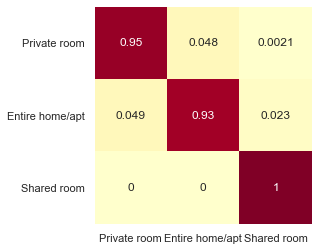

In [32]:
print("Model: SVC(kernel='rbf')")
print("Num atributes: 1 | Cat atributes: 1")  # All the variable are used
print(f"Best parameters: {scores_gs.best_params_}")  # Best parameters
print(f"Accuracy: {scores_gs.best_score_:0.4f}")  # Best accuracy

# A confusion matrix of the results
cf_matrix = confusion_matrix(y_train, scores_gs.predict(X_train_t))
row_sums = cf_matrix.sum(axis=1, keepdims=True)
norm_cf_matrix = cf_matrix / row_sums
sns.heatmap(
    norm_cf_matrix,
    square=True,
    annot=True,
    cbar=False,
    cmap="YlOrRd",
    xticklabels=y_train.unique(),
    yticklabels=y_train.unique(),
)
plt.show()

Vemos que tras el proceso de optimización de los hiperparámetros hemos pasado de una exactitud de 0.8412 a 0.8792. La mejora se aprecia especialmente en la matriz de confusión, donde las tres clases son clasificadas correctamente en más de un 90% e incluso la clase minoritaría Shared room es clasificada correctamente en un 100%. El que se alcance una exactitud tan alta para la clase minoritaría podría ser un sintoma de overfitting, porque a pesar de usar validación cruzada durante el proceso de hiperparametrización, al ir seleccionando los mejores hiperparámetros para el dataset se puede incurrir en overfitting si se realizan muchos iteraciones en la busqueda de los hiperparámetros. En este caso, solo hemos realizado 4 iteraciones que no deberían ser demasiadas.

## 9. Evaluación del Test set

Se ha evaluado el test set usando el modelo obtenido tras la hiperparametrización.


Model: SVC(kernel='rbf')
Num atributes: 1 | Cat atributes: 1
Parameters: SVC(C=23.432011213333332, class_weight='balanced', gamma=0.5721864533333333)
Accuracy: 0.8829


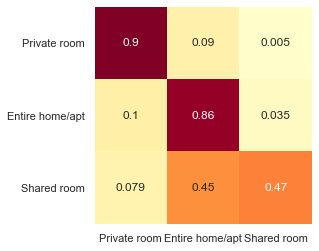

In [33]:
# Model: SVC(kernel='rbf')
from sklearn.metrics import accuracy_score

# Preparation of X and y from the test_set and train_set
X_test = test_set.drop("room_type", axis=1)
y_test = test_set.room_type
X_train = train_set.drop("room_type", axis=1)
y_train = train_set.room_type

# A column transformer with QuantileTransformer for the numeric variables
# and OneHotEncoder for the categorical variables
trans = [
    ("num", QuantileTransformer(), make_column_selector(dtype_include=np.number)),
    ("cat", OneHotEncoder(), make_column_selector(dtype_include=object)),
]
ct = ColumnTransformer(
    trans,
    remainder="drop",
)

# Transformation of the train and test X
X_train_t = ct.fit_transform(X_train)
X_test_t = ct.transform(X_test)

# Load the model from GridSearch
best_model = scores_gs.best_estimator_
# Fit the model
best_model.fit(X_train_t, y_train)
# Predict
y_pred = best_model.predict(X_test_t)

# Print the results
print("Model: SVC(kernel='rbf')")
print("Num atributes: 1 | Cat atributes: 1")  # All the variable are used
print(f"Parameters: {scores_gs.best_estimator_}")  # Parameters
print(f"Accuracy: {accuracy_score(y_test, y_pred):0.4f}")  # Accuracy

# A confusion matrix of the results
cf_matrix = confusion_matrix(y_test, y_pred)
row_sums = cf_matrix.sum(axis=1, keepdims=True)
norm_cf_matrix = cf_matrix / row_sums
sns.heatmap(
    norm_cf_matrix,
    square=True,
    annot=True,
    cbar=False,
    cmap="YlOrRd",
    xticklabels=y_train.unique(),
    yticklabels=y_train.unique(),
)
plt.show()

Evaluando el modelo obtenido tras la hiperparametrización con el test set, obtenemos una exactitud de 0.8829, que es incluso más alta que la obtenidad en el entrenamiento (0.8792). Por lo cual podemos concluir que no hemos sufrido overfitting en el modelo. Con respecto a la matriz de confusión, clasificamos correctamente las dos clases mayoritarios con puntuaciones de 0.9 para private room  y 0.86 para entire home/apt. Sin embargo, para shared room la puntuación disminuye a 0.47. Sin duda al tener pocas entidades de esta clase es difícil para el modelo de clasificar, pero el hecho de no clasificarla correctamente no tiene una influencia importante en la exactitud final.

## 10. Conclusiones

En esta parte del trabajo se ha realizado una tarea de clasificación para los datos de airBnB ya estudiados en el trabajo 1. Se han usado modelos de maquinas de vectores de soporte para clasificar las diferentes clases de la variable objetivo room_type.

Se ha usado dos modelos LinearSVC y SVC. Primero se han entrenado los modelos usando los parámetros por defecto. En general, los modelos no han alcanzado exactitudes muy altas llegando a un máximo de 0.8784 para el modelo LinearSVC. Se ha encontrado que las variables numéricas son las más importantes a la hora de obtener una exactitud alta. Además, en todos los casos los modelos tuvieron dificultades de clasificar la clase minoritaria Shared room.

Por último, se ha estudiado la hiperparametrización en el modelo SVC usando el kernel *rbf*. Se han optimizado los parámetros gamma y C. Para la optimización se han realizado 4 iteraciones sucesivas de busqueda, disminuyendo el rango tras cada iteración. Las dos primeras estaban logarítmicamente equiespaciadas y las dos últimas linealmente. Tras el proceso de hiperparametrización se mejoró a exactitud a 0.8792. La matriz de confusión mostró muy buenos resultados llegando a clasificar correctamente el 100% de las instancias de la clase minoritaria. 

Al evaluar el modelo final con el test set se mantuvo una exactitud alta (0.8829), comparable con los resustados del entrenamiento. Se puede remarcar que en el testset el modelo tuvo un menor porcentaje de acierto al clasificar la clase minoritaria (0.47). Comparando con los resultados del trabajo 1, tras la hiperparametrización se alcanza mejores resustandos de exactitud que con los modelos estudiados en el trabajo 1.